<a href="https://colab.research.google.com/github/SonalikaSingh/CNN/blob/main/CB_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**DATA EXPLORATION**

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

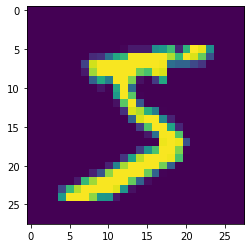

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train[0]

5

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

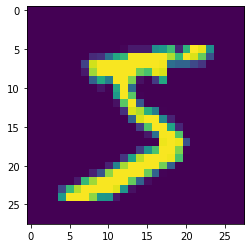

In [13]:
plt.imshow(X_train[0])

**DNN**

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1216 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0645 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0399 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9785


[0.07771507650613785, 0.9785000085830688]

**CNN**

In [21]:
y_train.reshape(-1,)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
y_train[0].shape

()

In [40]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [41]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [42]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1370 - accuracy: 0.9588
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0314 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0072 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 53s 28m